# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel K.\
_Student No._: 2021-07451\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/03/2024 12:59pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JED JERREL ESCARAN**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
#!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [4]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [5]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [6]:
import pandas as pd
import numpy as np

data_pd = pd.DataFrame(data)                                                    # converting data to pandas dataframe for easier data manipulation
#print(data_pd)
r50u_index = data_pd.columns.get_loc('petroR50_r') - 1                          # taking the index of r50u, -1 to account for index 0
r90_index = r50u_index + 3                                                      # +3 since theres u,r,z so r90u starts 3 indexes after r50u

def get_features_targets(data_pd):
  r50_div_r90 = []                                                              # for storing r50/r90 values
  for i in range(3):                                                            # range 3 since u,r,z
    div = data_pd.iloc[:,r50u_index + i] / data_pd.iloc[:,r90_index + i]        # r50/r90
    r50_div_r90.append(div)
  r50_div_r90_pd = pd.DataFrame(r50_div_r90).T                                  # transposing to match data.pd shape and to be able to use pd.concat
  r50_div_r90_pd.columns = ['R50/R90_u','R50/R90_r','R50/R90_z']                # labeling

  features_with_div = pd.concat([data_pd.iloc[:,:10],r50_div_r90_pd], axis = 1) # adjoining r50/r90 with the rest of the preceeding data

  targets = data_pd.iloc[:,-1]                                                  # taking the last column as targets

  return features_with_div , targets                                            # returning

In [7]:
features,targets = get_features_targets(data_pd)                                # calling func
print("Features shape:", features.shape)                                        # verifying shape
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


After splitting, the shape of the features and target dataset match with the aforementioned expected shape.

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [8]:
from sklearn.tree import DecisionTreeClassifier                                 # importing decision tree classifier
from sklearn.model_selection import train_test_split                            # train_test_split function
from sklearn import metrics                                                     # scikit-learn metrics module for accuracy calculation

def predict_class(features, targets):
  f_train, f_test, t_train, t_test = train_test_split(features, targets, test_size=0.20)  # splitting to 80% training and 20% test

  clf = DecisionTreeClassifier()                                                # create decision tree classifer object
  clf = clf.fit(f_train,t_train)                                                # training classifier

  t_pred = clf.predict(f_test)                                                  # testing/predicting the response for test dataset
  t_pred = pd.Series(t_pred)                                                    # converting to pd series

  return t_pred, t_test                                                         # returning predicted and actual values

In [9]:
predicted, actual = predict_class(features, targets)

# to check confusion map if accurate
print('Predicted values:')
print(predicted.value_counts())
print('Actual values:')
print(actual.value_counts())

Predicted values:
elliptical    54
merger        52
spiral        50
dtype: int64
Actual values:
elliptical    58
merger        52
spiral        46
Name: class, dtype: int64


Manually counting/cross-checking the predicted and actual values with the generated heat map below, we can verify that the labels and the confusion matrix itself is accurate.

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

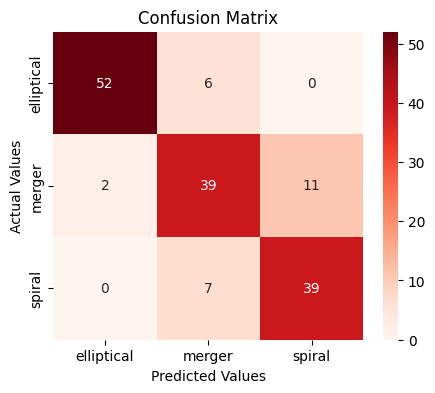

In [10]:
from sklearn.metrics import confusion_matrix                                    # for making the confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns                                                           # to present the confusion matrix

cm = confusion_matrix(actual, predicted)                                        # taking actual and predicted data and making a confusion matrix out of it
cm_df = pd.DataFrame(cm,                                                        # converting to pd dataframe, adding labels
                     index = ['elliptical','merger','spiral'],
                     columns = ['elliptical','merger','spiral'])

                                                                                # plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, cmap='Reds', fmt='.0f', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

From the heatmap, we can see that the model was trained well and was able to accurately predict the classifications of our test set. The accuracy is computed below:


In [11]:
print("Accuracy:",metrics.accuracy_score(actual, predicted))

Accuracy: 0.8333333333333334
